# Analyze sensor and sun angles across Switzerland with S2

Needed by RTM code
- solar_zenith_angle
- viewing_zenith_angle
- solar_azimuth_angle
- viewing_azimuth_angle

In [14]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [15]:
angles_path = '../results/s2_angles_switzerland.pkl'

with open(angles_path, 'rb') as f:
    df = pickle.load(f)

df.head()

,sun_azimuth_angle,sun_zenith_angle,sensor_azimuth_angle,sensor_zenith_angle
499,133.551547,25.652906,102.630666,8.385091
478,142.520543,26.702142,283.388907,7.462434
479,141.488573,25.959152,283.311567,8.365597
480,140.393445,25.224769,285.021481,9.179998
481,140.998745,27.257679,169.097286,2.795930


In [3]:
# Check that angles were present for every acquisition
nan_counts = df.isna().sum()
print(nan_counts)

sun_azimuth_angle       0
sun_zenith_angle        0
sensor_azimuth_angle    0
sensor_zenith_angle     0
spacecraft_name         0
dtype: int64


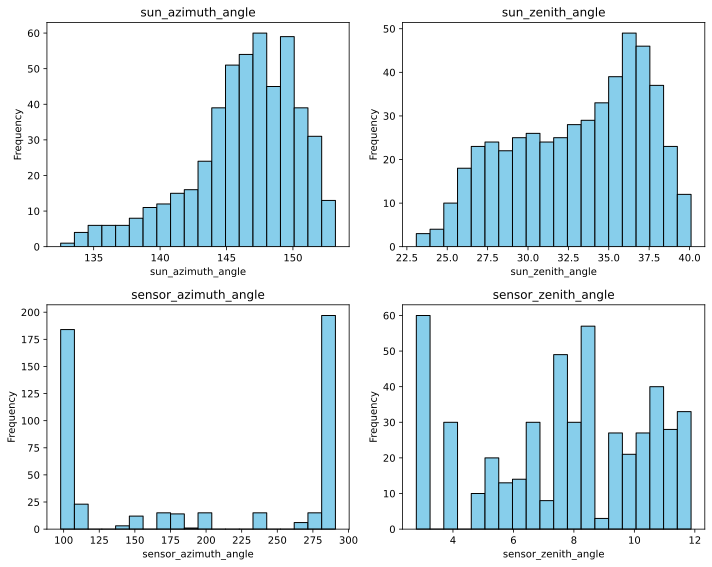

In [18]:
# Plot distribution of angles
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(df): #
    ax = axes[i // 2, i % 2]  # Calculate subplot index
    df[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.set_title(column)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

spacecraft_name
Sentinel-2B    258
Sentinel-2A    242
Name: count, dtype: int64


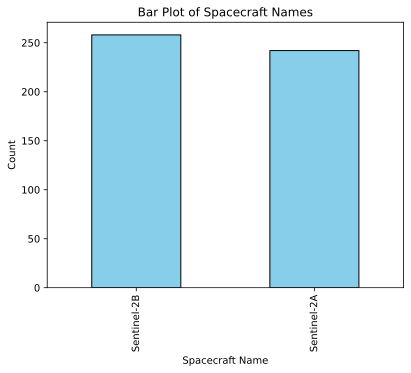

In [9]:
# Check distribtion among the 2 spacecrafts

spacecraft_counts = df['spacecraft_name'].value_counts()
print(spacecraft_counts)
spacecraft_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Spacecraft Name')
plt.ylabel('Count')
plt.title('Bar Plot of Spacecraft Names')

# Show the plot
plt.show()

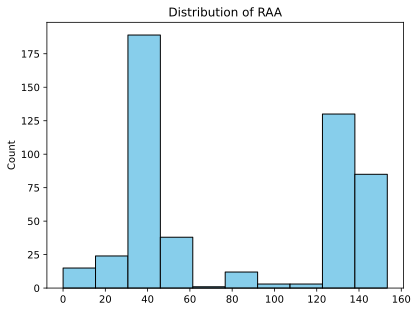

In [19]:
# Check relative azimuth angle distribution

raa = np.abs(df['sun_azimuth_angle'] - df['sensor_azimuth_angle'])
raa.plot(kind='hist', color='skyblue', edgecolor='black')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of RAA')

# Show the plot
plt.show()